In [34]:
import spacy
import matplotlib.pyplot as plt
import numpy as  np
from sklearn.metrics.pairwise import cosine_distances
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
nlp = spacy.load("en_core_web_md")
text = "laptop computer coffee tea water liquid dog cat kitty"

In [4]:
doc = nlp(text)
for token in doc:
    print(token.vector.shape)
    if token.text == "laptop":
        print(token.vector[:20].sum())

(300,)
5.710388
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)


In [5]:
vectors = np.array([token.vector for token in doc])
dist_matrix = cosine_distances(vectors)
dist_matrix

array([[0.        , 0.37442482, 0.74142045, 0.8732405 , 0.89249164,
        0.8211015 , 0.86619306, 0.81714654, 0.8521989 ],
       [0.37442482, 0.        , 0.86700886, 1.0201926 , 0.7899632 ,
        0.752267  , 0.9350179 , 0.9331958 , 1.0325952 ],
       [0.74142045, 0.86700886, 0.        , 0.19341129, 0.6659245 ,
        0.6364664 , 0.79230726, 0.801232  , 0.79455024],
       [0.8732405 , 1.0201926 , 0.19341129, 0.        , 0.7208127 ,
        0.70926476, 0.82356334, 0.77734023, 0.7547739 ],
       [0.89249164, 0.7899632 , 0.6659245 , 0.7208127 , 0.        ,
        0.37307823, 0.85224986, 0.9072304 , 0.9392361 ],
       [0.8211015 , 0.752267  , 0.6364664 , 0.70926476, 0.37307823,
        0.        , 0.9022879 , 0.90171564, 0.91963387],
       [0.86619306, 0.9350179 , 0.79230726, 0.82356334, 0.85224986,
        0.9022879 , 0.        , 0.17791837, 0.4034366 ],
       [0.81714654, 0.9331958 , 0.801232  , 0.77734023, 0.9072304 ,
        0.90171564, 0.17791837, 0.        , 0.22756696],


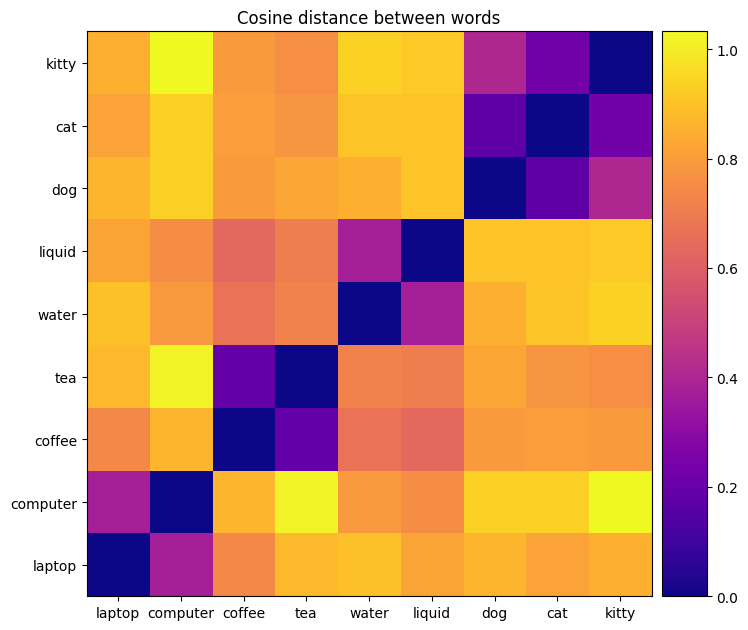

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(8, 16))
ax = fig.add_subplot(1, 1, 1)

graph = ax.matshow(dist_matrix, cmap="plasma")
ax.invert_yaxis()
ax.set_xticks(ticks=range(len(doc)), labels=doc)
ax.xaxis.set_ticks_position("bottom")
ax.set_yticks(ticks=range(len(doc)), labels=doc)
ax.set_title("Cosine distance between words")

# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="8%", pad=0.1)

# colorbar in axe
cbar = fig.colorbar(graph, cax=cax)

# the closer the words are to 0, the more similar they are in meaning.